In [1]:
# 1b eigenvalue computation

import sympy as sp

c = sp.Symbol('c')
g = 3

G = sp.Matrix([
    [(c/g), (c/g),(c/g),(c/g)],
    [(2 * c/g), (2 * c/g),(2 * c/g),(2 * c/g)],
    [(3 * c/g), (3 * c/g),(3 * c/g),(3 * c/g)],
    [(4 * c/g), (4 * c/g),(4 * c/g),(4 * c/g)],
])
vals = G.eigenvals()
print(vals)

{10*c/3: 1, 0: 3}


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    
    for idx,_ in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0

        else:
            N = S[idx - 1] + I[idx-1] + R[idx-1]

            dS_dt = (-beta * S[idx-1] * I[idx-1]) / N
            dI_dt = (beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]) 
            dR_dt = (gamma * I[idx-1])
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

0.45
0.9
1.35
1.8


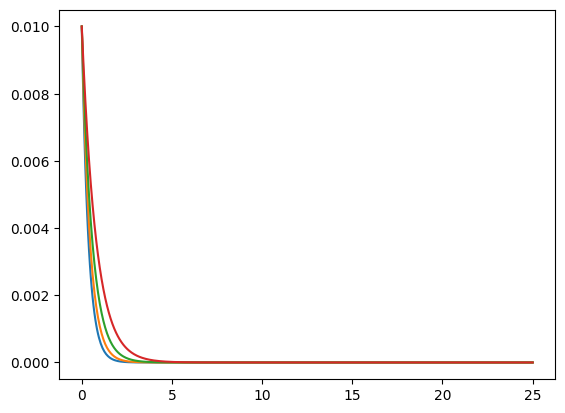

In [3]:
# sus = .99
# inf = .01
# beta = pc = .45 * p ... p is dif for each pop
c = .45

ps = [1,2,3,4]

for p in ps:
    beta = c * p 
    _,I,_,T = SIR(S0=.99,I0 = .01,R0 = 0, beta = beta, gamma = 3, t_max = 25, stepsize = .05)
    print(beta)
    plt.plot(T,I)


In [6]:
def SIR_multiple_populations(S0,I0,R0, pC, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    G = len(S0)
    S = np.zeros([len(T),G])
    I = np.zeros([len(T),G])
    R = np.zeros([len(T),G])

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:] + I[0,:] + R[0,:]
        else:
            Q = np.diag(S[idx-1,:]) @ pC @ I[idx-1,:] / N # compare this to notes...
            dS_dt = -Q
            dI_dt = Q - gamma*I[idx-1,:]
            dR_dt = gamma*I[idx-1,:]
            
            S[idx] = S[idx-1,:] + dS_dt * stepsize
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

(0.0, 10.50525)

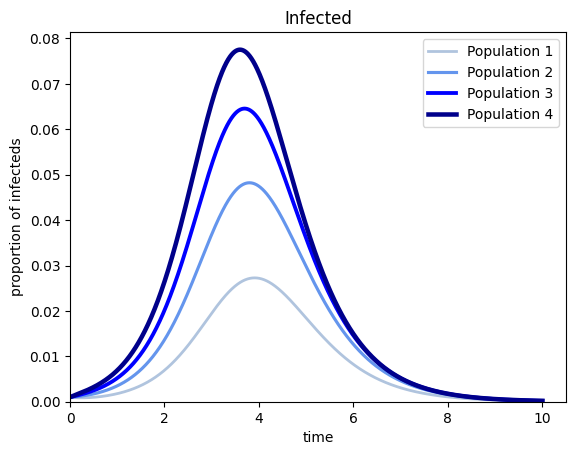

In [8]:
# SIR(S0,I0,R0, pC, gamma, t_max, stepsize):
pC = [[.45,.45,.45,.45],
      [.9,.9,.9,.9],
      [1.35,1.35,1.35,1.35],
      [1.8,1.8,1.8,1.8]]

S,I,_,T = SIR_multiple_populations([999,999,999,999],[1,1,1,1],[0,0,0,0],
             pC,3,10,0.005)
fig, ax = plt.subplots()

N = 1000
ax.plot(T,I[:,0] / N, c = "lightsteelblue", label = "Population 1", lw = 2)
ax.plot(T,I[:,1]/ N , c = "cornflowerblue", label = "Population 2", lw = 2.25)
ax.plot(T,I[:,2] / N, c = "blue", label = "Population 3", lw = 2.75)
ax.plot(T,I[:,3] / N, c = "darkblue", label = "Population 4", lw = 3.25)

ax.set_xlabel('time')
ax.set_ylabel('proportion of infecteds')
ax.legend()
ax.set_title("Infected")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

(0.0, 10.50525)

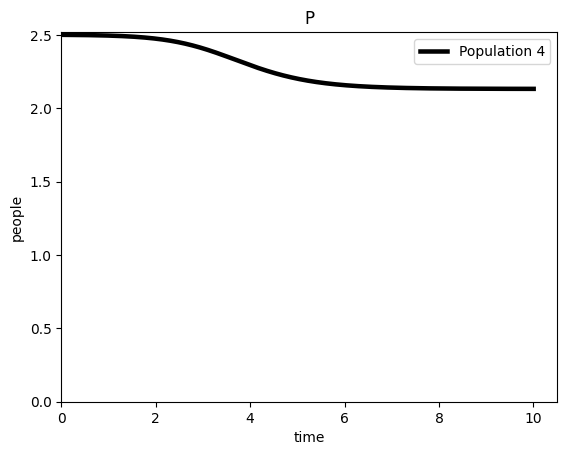

In [ ]:
fig, ax = plt.subplots()

N = 1000

ax.plot(T,S[:,0] / N, c = "lightsteelblue", label = "Population 1", lw = 2)
ax.plot(T,S[:,1] / N, c = "cornflowerblue", label = "Population 2", lw = 2.25)
ax.plot(T,S[:,2] / N, c = "blue", label = "Population 3", lw = 2.75)
ax.plot(T,S[:,3] / N , c = "darkblue", label = "Population 4", lw = 3.25)

P = (1 * S[:,0] / 1000) + (2 * S[:,1] / 1000) + (3 * S[:,2] / 1000) + (4 * S[:,3] / 1000) 
P = P / ((S[:,0] / 1000) + (S[:,1] / 1000) + (S[:,2] / 1000) + (S[:,3] / 1000))



ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_title("SUS")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
# ax.clear()

ax.clear()
ax.plot(T,P, c = "black", label = "Population 4", lw = 3.25)

ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_title("P")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)


Write code for a branching process that, starting from a single infection, draws G generations,
with each infection creating N B(R0, k) additional infections. Use your code to estimate q the
probability2 that an epidemic dies in finite time, for R0 = 3 and k = 0.1, 0.5, 1.0, 5.0, and
10.0.3 Provide your answers in a table, out to 3 decimal places.

In [128]:
from scipy.stats import nbinom


def draw_binomial(k):
    R0 = 3 # Mean R0
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    draw = nbinom.rvs(n=n,p=p)
    draws = nbinom.rvs(n=n,p=p,size=10)
    return draw

def simulate(num_generations, k):
    num_drawn = draw_binomial(k)
    
    # prevent runaway condition
    if(num_generations > 20):
        return False

    #dies
    if (num_drawn == 0):
        return True
    
    # spawns new generations
    else:
        for _ in range(num_drawn):
            if not simulate(num_generations + 1, k):
                return False
        return True


In [142]:
# simulate many 
NUM_SIMS = 100000

ks = [0.1,.5,1,5,10]

props = []
for k in ks:
    cooked = 0
    for i in range(NUM_SIMS):
        res = simulate(0, k)
        if res == False: # grows large
            cooked += 1
    props.append(cooked/NUM_SIMS)

print(props)

[0.16207, 0.50175, 0.66645, 0.88016, 0.91155]


In [160]:
for prop in props:
    print(1-prop)

0.8379300000000001
0.49824999999999997
0.33355
0.11983999999999995
0.08845000000000003
